<a href="https://colab.research.google.com/github/JaimeRosique/ComputerScience/blob/main/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1, Sesión 2: Derivadas y descenso por gradiente

## 1. Derivadas

**Derivada:** $\;$ de $\,f:\mathbb{R}\to\mathbb{R}\,$ en $x$ es la pendiente de la recta tangente a $f$ en $x$

**Ejemplo:** $\quad f(x)=5x^3+2x^2-3x$
$$\begin{align*}
f'(x)&=15x^2+4x-3,\quad f'(x)=0\to x_1=-3/5,\, x_2=1/3\\
f''(x)&=30x+4,\quad f''(x_1)=-14<0\to\text{máximo},\quad f''(x_2)=14>0\to\text{mínimo}
\end{align*}$$

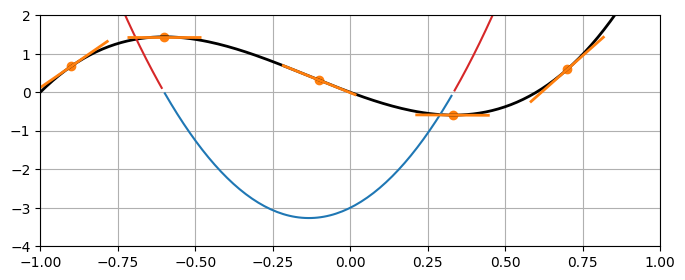

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
f = lambda x: 5 * np.power(x, 3) + 2 * np.square(x) - 3 * x; d = lambda x: 15 * np.square(x) + 4 * x - 3
fig, ax = plt.subplots(1, 1, figsize=(8, 3)); ax.grid(); ax.axis([-1, 1, -4, 2])
x = np.linspace(-1, 1, 200); plt.plot(x, f(x), c='black', lw=2)
plt.plot(x, np.ma.masked_less(d(x), 0), c='C3')
plt.plot(x, np.ma.masked_greater_equal(d(x), 0), c='C0')
X = np.array([-.9, -.6, -.1, .33, .7]); Y = f(X); ax.scatter(X, Y, c='C1')
L = np.zeros((len(X), 2, 2)); r = 0.12
L[:, 0, :] = np.c_[X - r, Y - r * d(X)]
L[:, 1, :] = np.c_[X + r, Y + r * d(X)]
ax.add_collection(LineCollection(L, lw=2, colors='C1', ls='solid'));

**Gradiente:** $\;$ de $\,\mathcal{f}:\mathbb{R}^n\to\mathbb{R}\,$ en $\,\boldsymbol{x}\,$ es la dirección en la que $f$ crece más rápidamente desde $\,\boldsymbol{x}$

**Neg-gradiente:** $\;$ el gradiente con signo cambiado indica la dirección en la que $f$ **decrece** más rápidamente

**Ejemplo:** $\quad \boldsymbol{x}=(x_1, x_2)^t, \quad y=f(\boldsymbol{x})=a_1x_1^2+a_2x_2^2, \quad a_1,a_2\neq 0$
$$\boldsymbol{g}(\boldsymbol{x})=\frac{\partial y}{\partial\boldsymbol{x}}%
=\begin{pmatrix}\frac{\partial y}{\partial x_1}\\\frac{\partial y}{\partial x_2}\end{pmatrix}%
=\begin{pmatrix}2a_1x_1\\2a_2x_2\end{pmatrix},\quad%
\boldsymbol{g}(\boldsymbol{x})=\boldsymbol{0}\to\boldsymbol{x}=\boldsymbol{0}$$
$$\mathbf{H}(\boldsymbol{x})=\frac{\partial\boldsymbol{g}}{\partial\boldsymbol{x}}
=\begin{pmatrix}\frac{\partial g_1}{\partial\boldsymbol{x}}\\\frac{\partial g_2}{\partial\boldsymbol{x}}\end{pmatrix}
=\begin{pmatrix}\frac{\partial g_1}{\partial x_1}&\frac{\partial g_1}{\partial x_2}\\%
\frac{\partial g_2}{\partial x_1}&\frac{\partial g_2}{\partial x_2}\end{pmatrix}
=\operatorname{diag}(2a_1, 2a_2)%
=\begin{cases}\succ 0&\text{si}\;a_1, a_2>0\\%
\prec 0&\text{si}\;a_1, a_2<0\\%
\text{indefinida}&a_1, a_2\,\text{de signo opuesto}\end{cases}$$

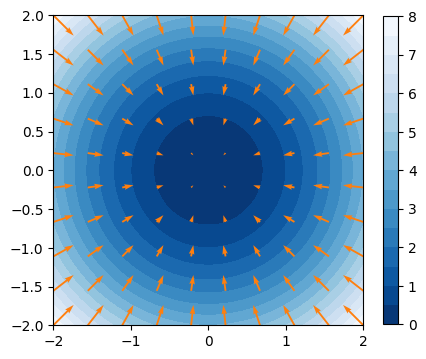

In [ ]:
import numpy as np; import matplotlib.pyplot as plt
R = np.linspace(-2, 2, 50); X1, X2 = np.meshgrid(R, R); X = np.c_[np.ravel(X1), np.ravel(X2)]
a = np.array([1, 1]); Y = (np.square(X) @ a).reshape(X1.shape)
_, ax = plt.subplots(1, 1, figsize=(5, 5)); ax.set(aspect='equal')
cp = ax.contourf(X1, X2, Y, 15, cmap='Blues_r'); plt.colorbar(cp, ax=ax, shrink=.8);
r = np.linspace(-2, 2, 10); x1, x2 = np.meshgrid(r, r); x = np.c_[np.ravel(x1), np.ravel(x2)]
neg_grad = -x @ np.diag(2 * a); ax.quiver(x[:, 0], x[:, 1], neg_grad[:, 0], neg_grad[:, 1], color='C1');

## 2. Descenso por gradiente

**Objetivo:** $\quad$ minimizar $\,\mathcal{f}:\mathbb{R}^n\to\mathbb{R}\,$ iterativamente, a partir de un punto de inicio $\,\boldsymbol{x}_0$

**Descenso por gradiente (GD):** $\quad\boldsymbol{x}_{i+1}=\boldsymbol{x}_i-\eta_i\boldsymbol{g}(\boldsymbol{x}_i)\;$ para $\,i=0,1,\dotsc$

**Factor de aprendizaje constante:** $\;\eta_i=\eta;\;$ GD puede no converger si $\,\eta\,$ es muy grande, o hacerlo muy lentamente si $\,\eta\,$ es muy pequeño

**Caída escalonada:** $\;\eta_i=\eta_0\gamma^{\lfloor i/s\rfloor}\,$ con *decay rate* $\,\gamma\,$ y *decay step* $\,s;\;$ por ejemplo, $\,\eta_0=0.1,\,\gamma=0.5\,$ y $\,s=10$    

**Momentum:** $\;$ acelera el movimiento cuando el gradiente no cambia mucho y lo frena cuando el gradiente cambia bruscamente
$$\boldsymbol{x}_{i+1}=\boldsymbol{x}_i-\eta\,\boldsymbol{m}_{i+1}\quad\text{con}\quad%
\boldsymbol{m}_{i+1}=\beta\boldsymbol{m}_i+\boldsymbol{g}(\boldsymbol{x}_i)\quad\text{donde}\quad%
\beta\in[0,1)\quad(\text{típicamente}\,\beta=0.9)$$

**Inconveniente:** $\;$ momentum suele oscilar al acercarse a un mínimo

**Momentum Nesterov:** $\;$ añade un paso de extrapolación para amortiguar oscilaciones
$$\boldsymbol{x}_{i+1}=\boldsymbol{x}_i+\boldsymbol{m}_{i+1}\quad\text{con}\quad%
\boldsymbol{m}_{i+1}=\beta\boldsymbol{m}_i-\eta\,\boldsymbol{g}(\boldsymbol{x}_i+\beta\boldsymbol{m}_i)\quad\text{donde}\quad%
\beta\in[0,1)\quad(\text{típicamente}\,\beta=0.9)$$

**Implementación:** $\;$ GD con caída escalonada y momentum Nesterov; devuelve el camino recorrido

In [ ]:
def GD(g, x0, eta=0.1, decay_rate=0.5, decay_step=10, beta=0.9, tol=1e-3, max_iter=100): #Lo dificil es calcular el gradiente tensor flow te lo hace o pytorch
    n = len(x0); #Fila 0 metes el inicial
    X = np.zeros((max_iter + 1, n)); #Construyes un array para luego plotear las modificaciones que haces (pequeños pasitos)
    X[0, :] = x0;
    delta = np.inf;  #Se pone para forzar la primera entrada
    i = 0;
    m = np.zeros(2);

    while np.max(np.abs(delta)) > tol and i < max_iter:
        m = beta * m - eta * g(X[i, :] + beta * m); #Objetivo calcular el momentum Nesterov (es algo mejor al normal)
        delta = m; #Pasito que das
        X[i+1, :] = X[i, :] + delta; #No machacas pq necesitas cada una de esas x para plotearlas
        i = i + 1;
        if i % decay_step == 0: eta = eta * decay_rate #Cada 10 steps modificas el decay_rate (esto es igual a elevarlo al cuadrado,cubo,etc)
    return X[:i+1, :]

*Explicación del código superior:*

eta=learning rate

decay_rate = la gamma, que multiplica al learning rate (arriba explicado)

decay_step = la "s" de la caida escalonada

beta = momentum

tol = si el siguiente paso que das, la diferencia entre x con ese valor paras (estas por el minimo)

max_iter = iteraciones máximas

**Función auxiliar:** $\;$ para mostrar el camino recorrido por GD en 2d

In [ ]:
def plot_GD(f, P, xlim=(-1.1, 1.1), ylim=(-1.1, 1.1), levels=15, cmap='Blues_r'):
    X1, X2 = np.meshgrid(np.linspace(*xlim, 50), np.linspace(*ylim, 50))
    X = np.c_[np.ravel(X1), np.ravel(X2)]; Y = np.apply_along_axis(f, 1, X).reshape(X1.shape)
    _, ax = plt.subplots(1, 1, figsize=(5, 5)); ax.set_xlim(xlim); ax.set_ylim(ylim)
    cp = ax.contourf(X1, X2, Y, levels=levels, cmap=cmap); plt.colorbar(cp, ax=ax, shrink=.8)
    ax.scatter(*P.T, c='C1', s=8); ax.scatter(*P[-1, :].T, c='C3', s=64)
    L = np.zeros((len(P)-1, 2, 2)); L[:, 0, :] = P[:-1, :]; L[:, 1, :] = P[1:, :]
    ax.add_collection(LineCollection(L, lw=1, colors='C1', ls='solid'));

**Ejemplo (cont.):** $\;$ Minimización de $\,y=a_1x_1^2+a_2x_2^2,\,a_1=a_2=1,\,$ a partir de $\,\boldsymbol{x}_0=(-1,-1)^t.\,$ En 15 iteraciones se aproxima al mínimo en $(0,0)^t$.

*Expliación del código abajo:*

·f=a1*x1^2 + a2*x2^2

·g(derivada de f) = 2*a1*x1 + 2*a2*x2

·el segundo parametro de GD es donde empieza "[-1, -1]"

iteraciones = 73  solución = [0.0711 0.0904]


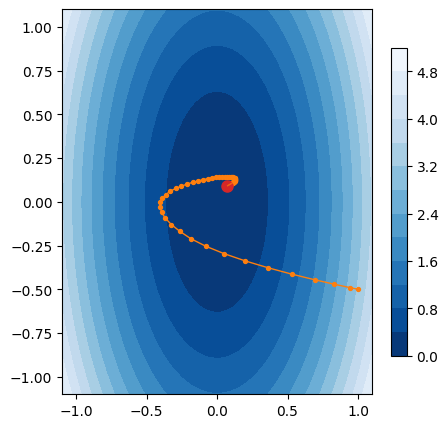

In [ ]:
a = np.array([3, 1]); f = lambda x: (a @ np.square(x)).sum(); g = lambda x: x @ np.diag(2 * a) #En la OG te da escalar en esta te da vector y así si puede rotar
P = GD(g, np.array([1, -0.5]), eta=0.01);

plot_GD(f, P)
print(f'iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

**Ejercicio:** $\;$ Estudia la convergencia y número de iteraciones de GD en función del ajuste del factor de aprendizaje y la $\beta$ de Nesterov.
1. GD estándar ($\beta=0$): $\;$ ¿Converge con factor de aprendizaje constante muy pequeño o muy grande? (val parecido a 0) pltnt cuanto más cercano a cero máyor convergencia, ya que si es pequeño dará pequeños pasos y si es muy grande como el momentum oscilará sobre el mínimo
2. GD estándar ($\beta=0$): $\;$ ¿Converge con caída escalonada muy rápida o muy lenta? (step sea distinto) entre medias como antes, ya que el decay_rate y el decay_step controlan a lo largo del tiempo como el factor de aprendizaje reduce su tamaño a lo largo del tiempo
3. Momentum Nesterov: $\;$ Si la caída escalonada se ajusta adecuadamente, ¿cuál es el efecto de $\beta$?

In [ ]:
#Preg 1 y 2:
a = np.array([1, 1])
g = lambda x: x @ np.diag(2 * a) #@: multipliación de matrices

max_iter = 500
beta = 0
x0 = np.array([-1,-1])
for eta in [10, 1, 0.1, 0.01, 0.001]:
  for step in [2,5,10]:
    P = GD(g,x0, eta, decay_step=step, beta=beta, max_iter=max_iter, tol=0)
    print(f'lrate = {eta} | step = {step} | iteraciones = {len(P)-1} | solución = {np.round(P[-1, :], 4)}')

lrate = 10 | step = 2 | iteraciones = 500 | solución = [-2258.3537 -2258.3537]
lrate = 10 | step = 5 | iteraciones = 500 | solución = [2.42370579e+08 2.42370579e+08]
lrate = 10 | step = 10 | iteraciones = 500 | solución = [-5.87434977e+16 -5.87434977e+16]
lrate = 1 | step = 2 | iteraciones = 4 | solución = [0. 0.]
lrate = 1 | step = 5 | iteraciones = 7 | solución = [0. 0.]
lrate = 1 | step = 10 | iteraciones = 12 | solución = [0. 0.]
lrate = 0.1 | step = 2 | iteraciones = 500 | solución = [-0.423 -0.423]
lrate = 0.1 | step = 5 | iteraciones = 500 | solución = [-0.1164 -0.1164]
lrate = 0.1 | step = 10 | iteraciones = 500 | solución = [-0.0135 -0.0135]
lrate = 0.01 | step = 2 | iteraciones = 500 | solución = [-0.9226 -0.9226]
lrate = 0.01 | step = 5 | iteraciones = 500 | solución = [-0.8176 -0.8176]
lrate = 0.01 | step = 10 | iteraciones = 500 | solución = [-0.6685 -0.6685]
lrate = 0.001 | step = 2 | iteraciones = 500 | solución = [-0.992 -0.992]
lrate = 0.001 | step = 5 | iteraciones = 

In [ ]:
#Preg 3
a = np.array([1,1])
g = lambda x: x @ np.diag(2 * a)

max_iter = 500
x0 = np.array([-1,-1])
for beta in [.1,.5,.9]:
  P = GD(g, np.array([-1,-1]), beta=beta)
  print(f'beta = {beta}  iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

beta = 0.1  iteraciones = 27  solución = [-0.0167 -0.0167]
beta = 0.5  iteraciones = 10  solución = [0.011 0.011]
beta = 0.9  iteraciones = 45  solución = [-0.0337 -0.0337]


**Ejercicio:** $\;$ Aplica GD a $\;y=\frac{1}{2}\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}+\boldsymbol{b}^t\boldsymbol{x}+c\;$ a partir de $\;\boldsymbol{x}_0=(-1,-1)^t,\;\boldsymbol{g}(\boldsymbol{x})=(\mathbf{A}+\mathbf{A}^t)\boldsymbol{x}+\boldsymbol{b},\;$ en los casos
$$\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,\text{bien condicionada}\quad\text{y}\quad%
\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,\text{peor condicionada};\quad\boldsymbol{b}=(-14, -6)^t,\;c=10$$
Comprueba que la solución se aproxime al mínimo, $\;\boldsymbol{x}^*=-(\mathbf{A}+\mathbf{A}^t)^{-1}\boldsymbol{b}$.

min = [0.3288 0.0847] | i = 12 | sol = [0.3282 0.0849]


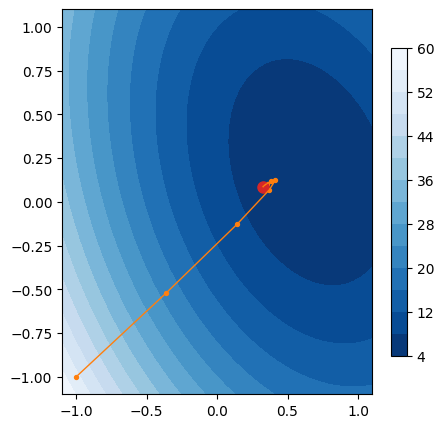

In [ ]:
A_b = np.array([[20,5],[5,16]])
A_p = np.array([[20,5],[5,2]])
b = np.array([-14, -6])
c= 10
#Prueba de sol.
x_star = -np.linalg.inv(A_b + A_b.T) @ b

y = lambda x: 0.5 * x.T @ A_b @ x + b @ x + c; g = lambda x: (A_b + A_b.T) @ x + b;
P = GD(g, np.array([-1,-1]), eta=0.01, beta=0.5); plot_GD(y, P)
print(f'min = {np.round(x_star, 4)} | i = {len(P)-1} | sol = {np.round(P[-1, :], 4)}')

Usar Y para pintarlo y g(x) sacar derivada para hacer GD

## 3. Diferenciación simbólica (opcional) Forma para que te haga las derivadas

**Diferenciación simbólica:** $\;$ diferenciación mediante computación simbólica

**[SymPy:](https://www.sympy.org/en/index.html)** $\;$ librería python de computación simbólica

**Ejemplo:** $\;f(x_1,x_2)=x_2\exp(x_1)\sqrt{x_1+x_2\exp(x_1)}$

In [ ]:
from sympy import symbols, exp, sqrt, simplify, lambdify
x, y = symbols('x1 x2')
spf = y * sqrt(x + y * exp(x)) * exp(x); f = lambdify([x, y], spf, "numpy")
spdx = simplify(spf.diff(x)); dx = lambdify([x, y], spdx, "numpy")
spdy = simplify(spf.diff(y)); dy = lambdify([x, y], spdy, "numpy")
display(spf, spdx, spdy)

x2*sqrt(x1 + x2*exp(x1))*exp(x1)

x2*(2*x1 + 3*x2*exp(x1) + 1)*exp(x1)/(2*sqrt(x1 + x2*exp(x1)))

(x1 + 3*x2*exp(x1)/2)*exp(x1)/sqrt(x1 + x2*exp(x1))

iteraciones = 61  solución = [0.2712 0.2006]


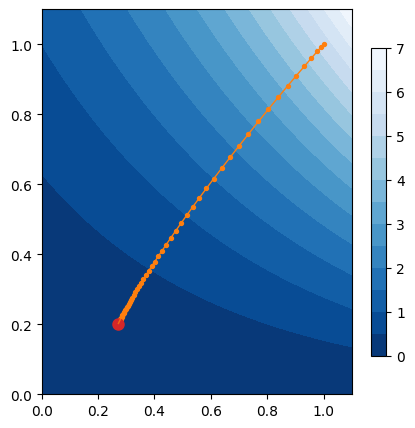

In [ ]:
import numpy as np; import matplotlib.pyplot as plt
npf = lambda xy: f(xy[0], xy[1])
npg = lambda xy: np.array([dx(xy[0], xy[1]), dy(xy[0], xy[1])])
P = GD(npg, np.array([1, 1]), eta=.001); plot_GD(npf, P, xlim=(0, 1.1), ylim=(0, 1.1))
print(f'iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

**Ejercicio:** $\;$ Aplica GD a la [**función Rosenbrock**](https://en.wikipedia.org/wiki/Rosenbrock_function), $\,f(x, y)=(a-x)^2+b(y-x^2)^2,\,$ con $\,a=1,\,$ $b=10\,$ y punto de inicio $\,(x_0,y_0)^t=(-1, -1)$. Comprueba que la solución se aproxime al mínimo global en $(a,a^2)$.

**Ejercicio:** $\;$ Aplica GD a Rosenbrock multidimensional, $\,f:\mathbb{R}^n\to\mathbb{R},\,$ con mínimo en $\,\boldsymbol{1}\,$ si $\,3\leq n\leq 7\,$ (y cerca de $\,(-1,1,\dotsc,1)\,$ si $\,4\leq n\leq 7\,$)
$$f(\boldsymbol{x})=\sum_{i=1}^{n-1}[100\,(x_{i+1}-x_i^2)^2+(1-x_i)^2]$$

**Ejercicio:** $\;$ Aplica GD a otras [**funciones de test para optimización**](https://en.wikipedia.org/wiki/Test_functions_for_optimization).